<a href="https://colab.research.google.com/github/ZhaoyangLiu08/nhanes_inferential_2023/blob/main/nhanes_inferential_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=2, palette= "viridis")
from sklearn.preprocessing import scale
from scipy import stats

In [13]:
demo = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2021-2022/DEMO_L.XPT', format='xport')
bp = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2021-2022/BPXO_L.XPT', format='xport')
body = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2021-2022/BMX_L.XPT', format='xport')
chol_total = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2021-2022/TCHOL_L.XPT', format='xport')
glycohemo = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2021-2022/GHB_L.XPT', format='xport')
crp = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2021-2022/HSCRP_L.XPT', format='xport')
dm = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2021-2022/DIQ_L.XPT', format='xport')
phy = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2021-2022/PAQ_L.XPT', format='xport')
whd = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2021-2022/WHQ_L.XPT', format='xport')

In [14]:
nhanes_data = demo.merge(bp, on='SEQN', how='left')\
                  .merge(body, on='SEQN', how='left')\
                  .merge(chol_total, on='SEQN', how='left')\
                  .merge(glycohemo, on='SEQN', how='left')\
                  .merge(crp, on='SEQN', how='left')\
                  .merge(dm, on='SEQN', how='left')\
                  .merge(phy, on='SEQN', how='left')\
                  .merge(whd, on='SEQN', how='left')


In [15]:
nhanes_data['DMDMARTZ'] = nhanes_data['DMDMARTZ'].apply(lambda x: 1 if x == 1 else 0)

nhanes_data['DMDEDUC2'] = nhanes_data['DMDEDUC2'].apply(lambda x: 1 if x in [4, 5] else 0)

nhanes_data['PAD680'].replace([7777, 9999], np.nan, inplace=True)
nhanes_data['WHD020'].replace([7777, 9999], np.nan, inplace=True)


<ipython-input-15-741ab5b7eaff>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nhanes_data['PAD680'].replace([7777, 9999], np.nan, inplace=True)
<ipython-input-15-741ab5b7eaff>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

Question 1: Association Between Marital Status and Education Level

Chi2 Statistic: 1677.006341355503, p-value: 0.0


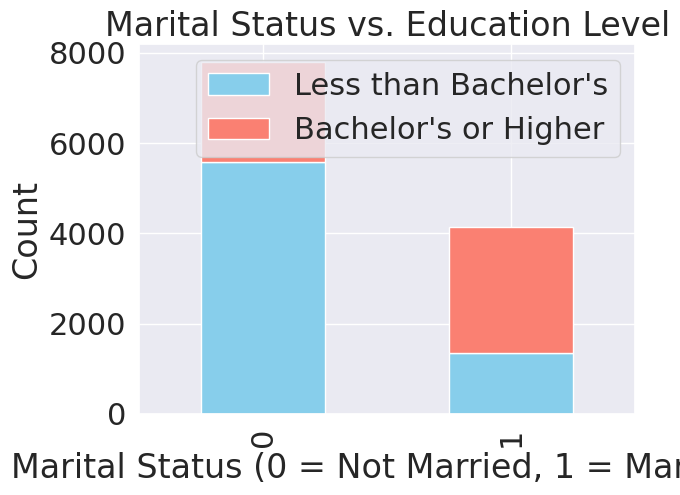

In [23]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(nhanes_data['DMDMARTZ'], nhanes_data['DMDEDUC2'])
chi2, p, dof, ex = chi2_contingency(contingency_table)


print(f"Chi2 Statistic: {chi2}, p-value: {p}")

contingency_table = pd.crosstab(nhanes_data['DMDMARTZ'], nhanes_data['DMDEDUC2'])

contingency_table.plot(kind="bar", stacked=True, color=["skyblue", "salmon"])
plt.title("Marital Status vs. Education Level")
plt.xlabel("Marital Status (0 = Not Married, 1 = Married)")
plt.ylabel("Count")
plt.legend(["Less than Bachelor's", "Bachelor's or Higher"])
plt.show()

Question 2: Mean Difference in Sedentary Behavior Time Based on Marital Status

T-Statistic: -3.8740971309213887, p-value: 0.0001078679819334709


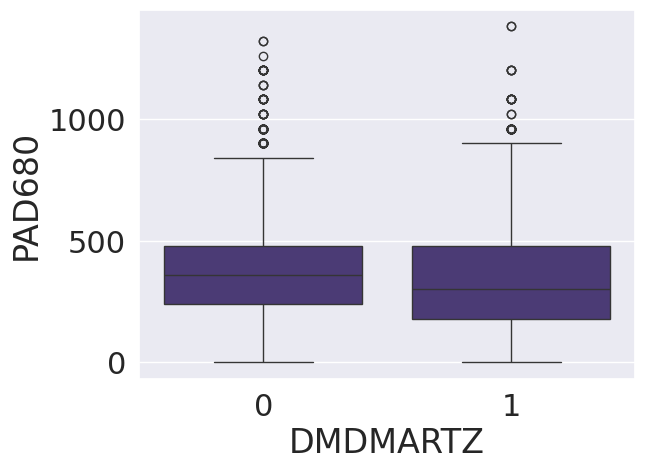

In [28]:
from scipy.stats import ttest_ind


married = nhanes_data[nhanes_data['DMDMARTZ'] == 1]['PAD680'].dropna()
not_married = nhanes_data[nhanes_data['DMDMARTZ'] == 0]['PAD680'].dropna()

t_stat, p_val = ttest_ind(married, not_married)

print(f"T-Statistic: {t_stat}, p-value: {p_val}")

sns.boxplot(x='DMDMARTZ', y='PAD680', data=nhanes_data)
plt.title('')
plt.show()

Question 3: Age and Marital Status Effects on Systolic Blood Pressure


                   sum_sq      df            F    PR(>F)
C(DMDMARTZ)  1.737748e+03     1.0     6.860916  0.008828
RIDAGEYR     5.889160e+05     1.0  2325.138035  0.000000
Residual     1.893791e+06  7477.0          NaN       NaN


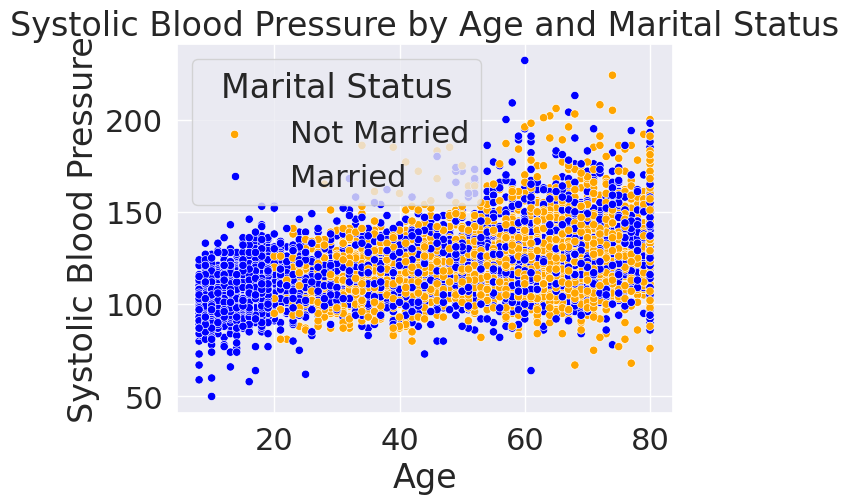

In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('BPXOSY3 ~ RIDAGEYR + C(DMDMARTZ)', data=nhanes_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

sns.scatterplot(x='RIDAGEYR', y='BPXOSY3', hue='DMDMARTZ', data=nhanes_data, palette=['blue', 'orange'])
plt.title("Systolic Blood Pressure by Age and Marital Status")
plt.xlabel("Age")
plt.ylabel("Systolic Blood Pressure")
plt.legend(title="Marital Status", labels=["Not Married", "Married"])
plt.show()

Question 4: Correlation Between Self-Reported Weight and Sedentary Behavior


Correlation: 0.1559714584645021, p-value: 1.6988498386828133e-44


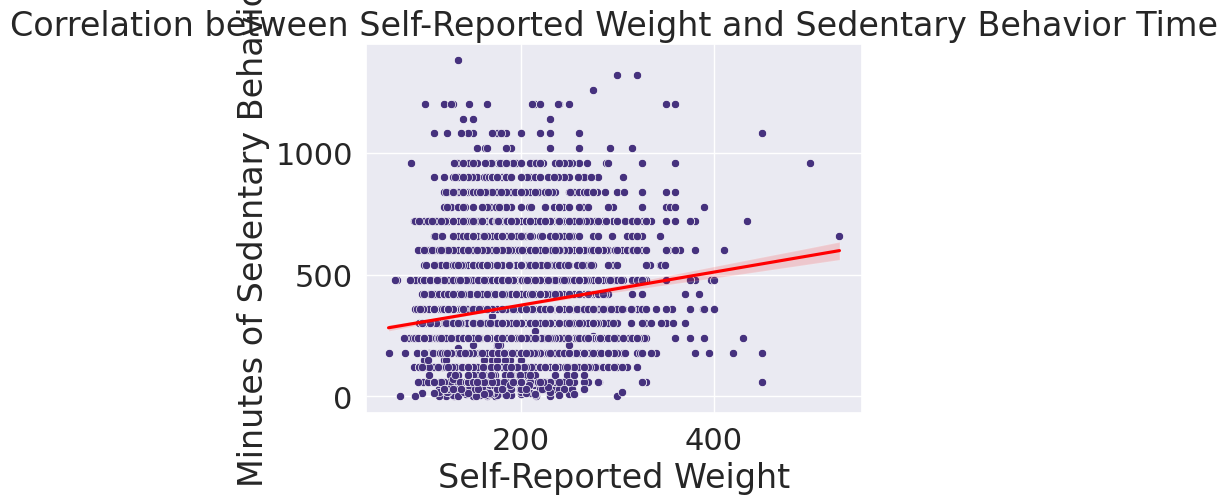

In [26]:
# Drop rows with NaN in either 'WHD020' or 'PAD680' to ensure equal length
subset_data = nhanes_data[['WHD020', 'PAD680']].dropna()

# Perform Pearson correlation
from scipy.stats import pearsonr
correlation, p_value = pearsonr(subset_data['WHD020'], subset_data['PAD680'])

print(f"Correlation: {correlation}, p-value: {p_value}")

sns.scatterplot(x='WHD020', y='PAD680', data=nhanes_data)
sns.regplot(x='WHD020', y='PAD680', data=nhanes_data, scatter=False, color='red')  # 添加趋势线
plt.title("Correlation between Self-Reported Weight and Sedentary Behavior Time")
plt.xlabel("Self-Reported Weight")
plt.ylabel("Minutes of Sedentary Behavior")
plt.show()

T-Statistic: 3.512968548737324, p-value: 0.00044547238204970766


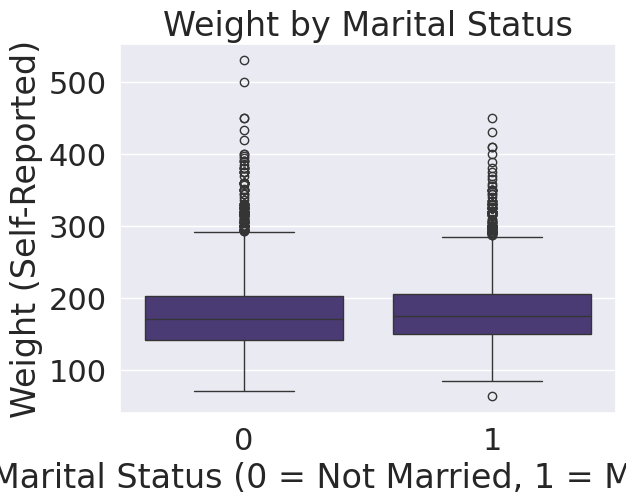

In [30]:
weight_marital_data = nhanes_data[['WHD020', 'DMDMARTZ']].dropna()

married_weight = weight_marital_data[weight_marital_data['DMDMARTZ'] == 1]['WHD020']
not_married_weight = weight_marital_data[weight_marital_data['DMDMARTZ'] == 0]['WHD020']

t_stat, p_value = ttest_ind(married_weight, not_married_weight)
print(f"T-Statistic: {t_stat}, p-value: {p_value}")

sns.boxplot(x='DMDMARTZ', y='WHD020', data=weight_marital_data)
plt.title("Weight by Marital Status")
plt.xlabel("Marital Status (0 = Not Married, 1 = Married)")
plt.ylabel("Weight (Self-Reported)")
plt.show()
